In [23]:
import yfinance as yf
import pandas as pd

In [2]:
sp500 = yf.Ticker("^GSPC")

In [3]:
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-07-06 00:00:00-04:00,4422.620117,4422.620117,4385.049805,4411.589844,3682020000,0.0,0.0
2023-07-07 00:00:00-04:00,4404.540039,4440.390137,4397.399902,4398.950195,3630480000,0.0,0.0
2023-07-10 00:00:00-04:00,4394.229980,4412.600098,4389.919922,4409.529785,3429600000,0.0,0.0


In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-06-28 00:00:00-04:00', '2023-06-29 00:00:00-04:00',
               '2023-06-30 00:00:00-04:00', '2023-07-03 00:00:00-04:00',
               '2023-07-05 00:00:00-04:00', '2023-07-06 00:00:00-04:00',
               '2023-07-07 00:00:00-04:00', '2023-07-10 00:00:00-04:00',
               '2023-07-11 00:00:00-04:00', '2023-07-12 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23996, freq=None)

### Cleaning and Visualisation our stock market data

<Axes: xlabel='Date'>

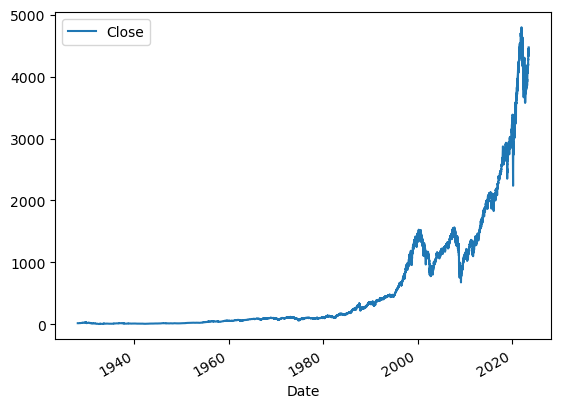

In [6]:
sp500.plot.line(y="Close",use_index=True)

In [7]:
del sp500["Dividends"]
del sp500["Stock Splits"]

### Setting up our target for machine learning 

In [9]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [10]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-07-06 00:00:00-04:00,4422.620117,4422.620117,4385.049805,4411.589844,3682020000,4398.950195
2023-07-07 00:00:00-04:00,4404.540039,4440.390137,4397.399902,4398.950195,3630480000,4409.529785
2023-07-10 00:00:00-04:00,4394.229980,4412.600098,4389.919922,4409.529785,3429600000,4439.259766


In [11]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [12]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-07-06 00:00:00-04:00,4422.620117,4422.620117,4385.049805,4411.589844,3682020000,4398.950195,0
2023-07-07 00:00:00-04:00,4404.540039,4440.390137,4397.399902,4398.950195,3630480000,4409.529785,1
2023-07-10 00:00:00-04:00,4394.229980,4412.600098,4389.919922,4409.529785,3429600000,4439.259766,1


In [14]:
#1 - means price went up
#0 - means price went down

In [15]:
sp500 = sp500.loc["1990-01-01":].copy()

In [16]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-07-06 00:00:00-04:00,4422.620117,4422.620117,4385.049805,4411.589844,3682020000,4398.950195,0
2023-07-07 00:00:00-04:00,4404.540039,4440.390137,4397.399902,4398.950195,3630480000,4409.529785,1
2023-07-10 00:00:00-04:00,4394.229980,4412.600098,4389.919922,4409.529785,3429600000,4439.259766,1


### Training an initial Machine learning model

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators =100, min_samples_split =100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [20]:
from sklearn.metrics import precision_score

predictions = model.predict(test[predictors])

In [24]:
predictions = pd.Series(predictions, index = test.index)

In [26]:
precision_score(test["Target"],predictions)

0.574468085106383

In [27]:
combined = pd.concat([test['Target'],predictions],axis =1)

<Axes: xlabel='Date'>

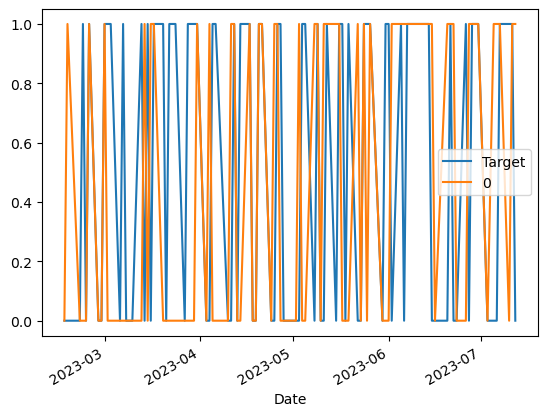

In [28]:
combined.plot()

### Building a backtesting System

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis =1)
    return combined

In [ ]:
def backtest(data, model, predictors, start = 2500, step = 250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [51]:
predictions = backtest(sp500, model, predictors)

In [50]:
predictions["Predictions"].value_counts()

0    3433
1    2513
Name: Predictions, dtype: int64

In [48]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5296458416235575

In [47]:
predictions["Target"].value_counts()/predictions.shape[0]

1    0.533972
0    0.466028
Name: Target, dtype: float64

### Adding additional predictors to our model

In [55]:
horizons = [2,5,60,250,1000]
new_predictors =[]

for horizon in horizons: 
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [56]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-06 00:00:00-04:00,4422.620117,4422.620117,4385.049805,4411.589844,3682020000,4398.950195,0,0.996023,0.0,0.995358,3.0,1.043912,31.0,1.098386,117.0,1.162313,532.0
2023-07-07 00:00:00-04:00,4404.540039,4440.390137,4397.399902,4398.950195,3630480000,4409.529785,1,0.998565,0.0,0.992394,2.0,1.039732,31.0,1.094695,117.0,1.158551,532.0
2023-07-10 00:00:00-04:00,4394.229980,4412.600098,4389.919922,4409.529785,3429600000,4439.259766,1,1.001201,1.0,0.996617,2.0,1.040931,32.0,1.096722,118.0,1.160905,532.0


### Improving our model

In [57]:
model = RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state=1)

In [68]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1] # returns 0 or 1 without proba
    preds[preds >= .6] = 1 
    preds[preds < .6] = 0
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis =1)
    return combined

In [74]:
#predictions = backtest(sp500, model, new_predictors)

In [67]:
sp500.fillna(0)

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-06 00:00:00-04:00,4422.620117,4422.620117,4385.049805,4411.589844,3682020000,4398.950195,0,0.996023,0.0,0.995358,3.0,1.043912,31.0,1.098386,117.0,1.162313,532.0
2023-07-07 00:00:00-04:00,4404.540039,4440.390137,4397.399902,4398.950195,3630480000,4409.529785,1,0.998565,0.0,0.992394,2.0,1.039732,31.0,1.094695,117.0,1.158551,532.0
2023-07-10 00:00:00-04:00,4394.229980,4412.600098,4389.919922,4409.529785,3429600000,4439.259766,1,1.001201,1.0,0.996617,2.0,1.040931,32.0,1.096722,118.0,1.160905,532.0


In [73]:
#predictions = backtest(sp500, model, new_predictors)

In [71]:
predictions["Predictions"].value_counts()

0    3433
1    2513
Name: Predictions, dtype: int64

In [72]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5296458416235575